In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
# osmnx.geometries.geometries_from_xml("/home/helge/Applications/osm-data/Manhattan/Test.osm.gz")
nodes = gpd.read_file("/home/helge/Applications/osm-data/Manhattan/Test.shp_nodes.shp")
links = gpd.read_file("/home/helge/Applications/osm-data/Manhattan/Test.shp_links.shp")

In [91]:
fsmax = links["freespeed"].max()

cmap = plt.get_cmap("viridis")

33.333333333333336


In [76]:
n_coords = np.array([list(*n.coords) for n in nodes["geometry"]])

minx = n_coords[:,0].min()
maxx = n_coords[:,0].max()
miny = n_coords[:,1].min()
maxy = n_coords[:,1].max()

In [81]:
print((maxy-miny)/(maxx-minx))

0.23941316715900762


[(5865.405258624814, 2809.3194202967547)]


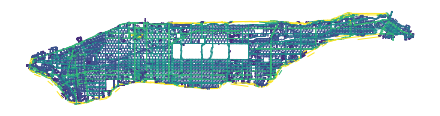

In [98]:
%matplotlib inline
fig, ax = plt.subplots(constrained_layout=True)

for n in nodes["geometry"]:
    print(list(n.coords))
    break

counter = 0
for l,f in zip(links["geometry"], links["freespeed"]):
    ll = list(l.coords)
    ax.plot([ll[0][0],ll[1][0]], [ll[1][1],ll[2][1]], c=cmap(f/fsmax), lw=1, zorder=-1)
    ax.plot([ll[1][0],ll[2][0]], [ll[1][1],ll[2][1]], c=cmap(f/fsmax), lw=1, zorder=-1)
    counter += 1
#     if counter >= 1000:
#         break

# ax.set_aspect((maxy-miny)/(maxx-minx))
ax.axis("off")
ax.set_rasterization_zorder(0)
ax.set_aspect(1)
# fig.colorbar(ax=ax)

fig.savefig("Figures/ManhattanLinksSpeeds.pgf", dpi=300, bbox_inches='tight')
# fig.savefig("Figures/ManhattanLinksSpeeds.jpg", dpi=300, bbox_inches='tight')
plt.show()

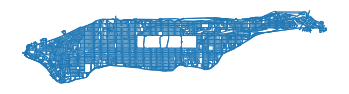

In [52]:
fig, ax = plt.subplots()#figsize=(6.4,4.8))

# nodes.plot(ax=ax, markersize=1)
links.plot(ax=ax, linewidth=1)
ax.axis("off")

# fig.savefig("Figures/ManhattanLinks.pgf")
plt.show()